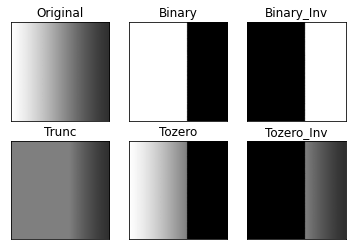

In [1]:
#函数：cv.threshold,cv.adaptiveThreshold
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt

#简单阈值
img10 = cv.imread("../Images/img10.png", 0)
ret,thresh1 = cv.threshold(img10,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img10,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img10,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img10,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img10,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original', 'Binary', 'Binary_Inv', 'Trunc', 'Tozero', 'Tozero_Inv']
image = [img10, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(image[i],'gray',vmin=0,vmax=255), plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

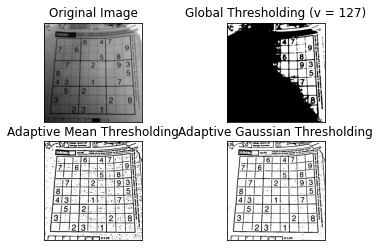

In [2]:
#自适应阈值
img9 = cv.imread("../Images/img9.png", 0)
img = cv.medianBlur(img9, 5)
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

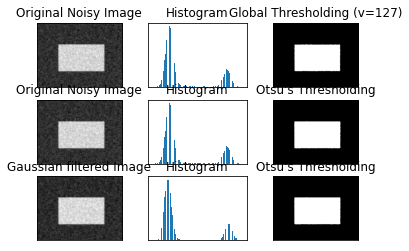

In [3]:
#Otsu 二值化
img11 = cv.imread("../Images/img11.png")
img11 = cv.cvtColor(img11, cv.COLOR_BGR2GRAY)
#global thresholding
ret1, th1 = cv.threshold(img11, 127, 255, cv.THRESH_BINARY)
#Otsu's thresholding
ret2, th2 = cv.threshold(img11, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
#Otsu's threshold after Gaussian filtering
blur = cv.GaussianBlur(img11, (5,5), 0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
images = [img11, 0, th1, img11, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()